### Challenge Set 3
**Topic:** Linear Regression and Train/Test Split challenges  
**Date:** 7/24/2016  
**Name:** Marc Gameroff

### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)

In [31]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### <a id='1'></a>Challenge 1:

In [176]:
# load the data into a dataframe
df = pd.read_csv('2013_movies.csv')

# X vector is all 1's
x = np.array([1]*100).reshape((100,1))
# Y is domestic total gross
y = df['DomesticTotalGross']

print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [177]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [178]:
# Fit the model
rgr = LinearRegression()
rgr.fit(x,y)

# Print B0 (the intercept)
print(rgr.intercept_)
# Note: there are no other parameters to estimate
print(rgr.coef_)

100596875.22
[ 0.]


In [179]:
# Verify that the intercept is the mean of Y
df['DomesticTotalGross'].mean()

100596875.22

**Conclusion:** With an intercept-only model, the best prediction is simply the mean of Y. 

In [180]:
predictions = rgr.predict(x)
print(predictions.shape)
print(y.shape)

(100,)
(100,)


In [181]:
fig, ax = plt.subplots()
ax.plot( y, predictions 'o')
ax.set_ylabel('Domestic Total Gross (Predicted)')
ax.set_xlabel('Domestic Total Gross (Observed)')
plt.show()

SyntaxError: invalid syntax (<ipython-input-181-283c3202941d>, line 2)

In [182]:
residuals = y - predictions
print(residuals.head())

0    3.240712e+08
1    3.084171e+08
2    3.001411e+08
3    2.674644e+08
4    1.904486e+08
Name: DomesticTotalGross, dtype: float64


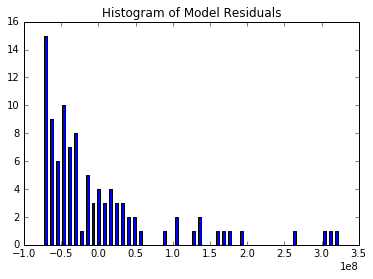

In [183]:
hist, bins = np.histogram(residuals, bins=50)
width =  .5 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('Histogram of Model Residuals')
plt.show()

### <a id='2'></a>Challenge 2:

In [184]:
domgross = df['DomesticTotalGross'] 
budget = df['Budget']
y, X = dmatrices('domgross ~ budget', data=df, return_type='dataframe')
print(X.shape)
print(y.shape)

(89, 2)
(89, 1)


In [185]:
# Fit the model
rgr = LinearRegression()
rgr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
# Print the intercept
print(rgr.intercept_)
# Print B1
print(rgr.coef_)

[ 44395595.18320854]
[[ 0.          0.78463743]]


In [187]:
# Calculate Y-hat and residuals
predictions = rgr.predict(X)
residuals = y - predictions

In [188]:
# Print R-squared
rgr.score(X, y)

0.28581388681583142

In [189]:
# Confirm shape of arrays
print(X.shape)
print(X['budget'].shape)
print(predictions.shape)
print(y.shape)
print(residuals.shape)

(89, 2)
(89,)
(89, 1)
(89, 1)
(89, 1)


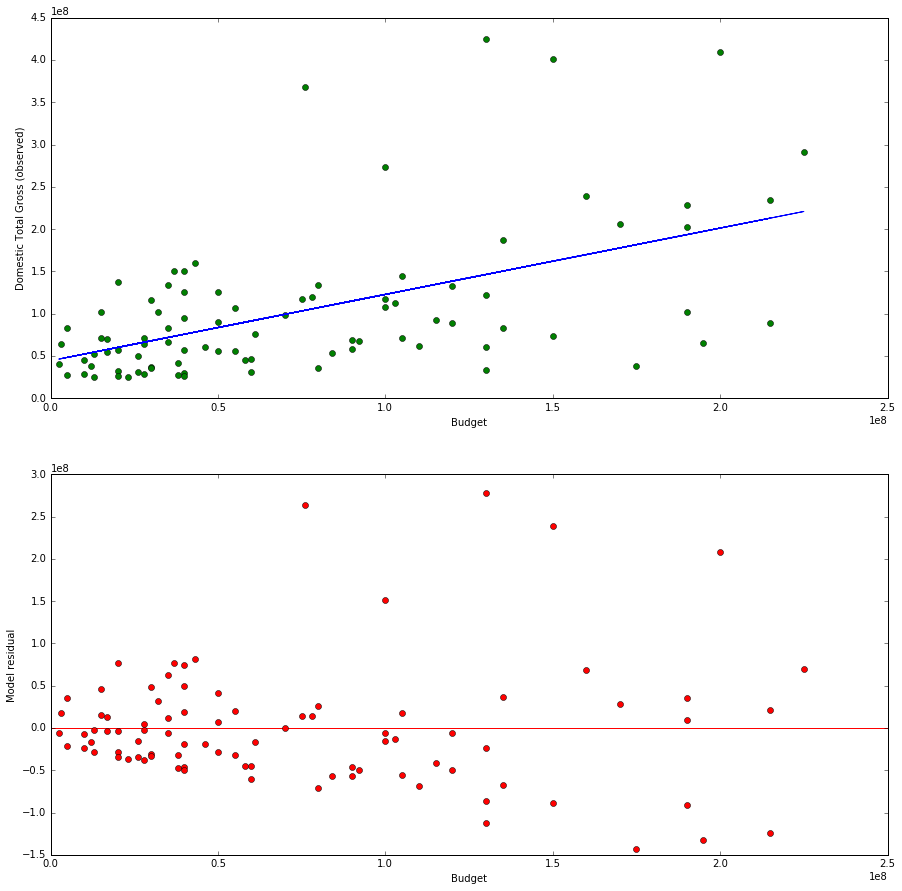

In [190]:
fig, (ax1, ax2) = plt.subplots(2, sharey=False, sharex=False, figsize=(15, 15))

ax1.set_xlabel('Budget')
ax2.set_xlabel('Budget')

ax1.plot(X['budget'], y, 'og')
ax1.plot(X['budget'], predictions, '-b')
ax1.set_ylabel('Domestic Total Gross (observed)')

ax2.axhline(y=0, color='red')
ax2.plot(X['budget'], residuals, 'or')

ax2.set_ylabel('Model residual')


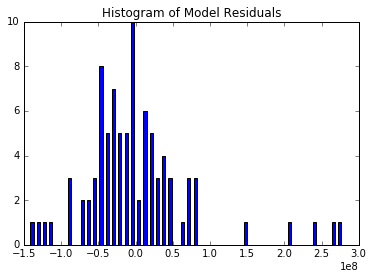

In [191]:
hist, bins = np.histogram(residuals, bins=50)
width =  .5 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('Histogram of Model Residuals')

The residuals are more normally distributed than with the intercept-only model.

### <a id='3'></a>Challenge 3:

In [192]:
domgross = df['DomesticTotalGross'] 
rating = df['Rating'] 
y, X = dmatrices('domgross ~ budget + runtime', data=df, return_type='dataframe')

In [193]:
X.head()

,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R]
0,1,0,1,0
1,1,0,1,0
2,1,1,0,0
3,1,1,0,0
4,1,0,1,0


In [194]:
y.head()

,domgross
0,424668047
1,409013994
2,400738009
3,368061265
4,291045518


In [195]:
# Fit the model
rgr = LinearRegression()
rgr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
# Print the intercept
print(rgr.intercept_)
# Print B1, B2, B3
print(rgr.coef_)

[  2.68492764e+08]
[[  0.00000000e+00  -1.37357048e+08  -1.57042995e+08  -1.98600335e+08]]


In [197]:
# Calculate Y-hat and residuals
predictions = rgr.predict(X)
residuals = y - predictions

In [198]:
# Print R-squared
rgr.score(X, y)

0.10922931211582154

In [199]:
# Confirm shape of arrays
print(X.shape)
print(predictions.shape)
print(y.shape)
print(residuals.shape)

(100, 4)
(100, 1)
(100, 1)
(100, 1)


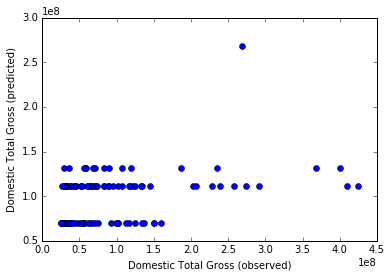

In [200]:
fig, ax = plt.subplots()
ax.plot(y, predictions, 'o')
ax.set_ylabel('Domestic Total Gross (predicted)')
ax.set_xlabel('Domestic Total Gross (observed)')
plt.show()

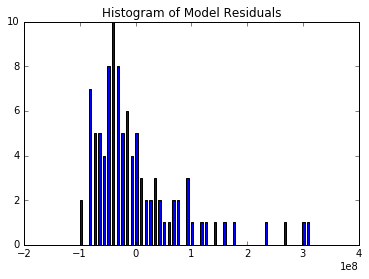

In [174]:
hist, bins = np.histogram(residuals, bins=50)
width =  .5 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('Histogram of Model Residuals')

### <a id='4'></a>Challenge 4:

In [232]:
budget = df['Budget'] 
rating = df['Rating'] 
runtime = df['Runtime']
y, X = dmatrices('domgross ~ budget + runtime + rating', data=df, return_type='dataframe')

In [233]:
# Fit the model
rgr = LinearRegression()
rgr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [234]:
print(X.shape)
print(y.shape)

(89, 6)
(89, 1)


In [235]:
X.head()

,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R],budget,runtime
0,1,0,1,0,130000000,146
1,1,0,1,0,200000000,129
2,1,1,0,0,150000000,108
3,1,1,0,0,76000000,98
4,1,0,1,0,225000000,143


In [236]:
# Print the intercept
print(rgr.intercept_)
# Print B1 to B5
print(rgr.coef_)

[-13498827.39382097]
[[  0.00000000e+00   1.77535173e+07  -1.00412416e+07  -7.71227577e+06
    7.03573362e-01   6.08325901e+05]]


In [237]:
# Calculate Y-hat and residuals
predictions = rgr.predict(X)
residuals = y - predictions

In [238]:
# Print R-squared
rgr.score(X, y)

0.30208073403796365

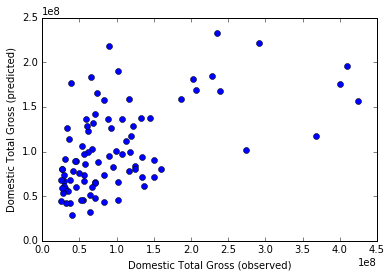

In [239]:
fig, ax = plt.subplots()
ax.plot(y, predictions, 'o')
ax.set_ylabel('Domestic Total Gross (predicted)')
ax.set_xlabel('Domestic Total Gross (observed)')
plt.show()

### <a id='5'></a>Challenge 5:

In [319]:
from sklearn import cross_validation as cv
from sklearn import metrics

In [323]:
# Use model from Challenge 2
domgross = df['DomesticTotalGross'] 
budget = df['Budget']
y, X = dmatrices('domgross ~ budget', data=df, return_type='dataframe')
print(X.shape)
print(y.shape)

(89, 2)
(89, 1)


In [324]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.250,random_state=1143)

model_train = LinearRegression().fit(x_train, y_train)

y_pred_train = model_train.predict(x_train)

training_error = metrics.mean_squared_error(y_train,y_pred_train)
print ('Training error = ' , training_error)
print("R-squared in training set: ", model_train.score(x_train,y_train))

y_pred_test = model_train.predict(x_test)

test_error = metrics.mean_squared_error(y_test,y_pred_test)
print ('\nTest error = ' , test_error)
print("R-squared in test set: ", model_test.score(x_test,y_test))

model_test = LinearRegression().fit(x_test, y_test)

Training error =  5.47415675981e+15
R-squared in training set:  0.313515053199

Test error =  5.10236126992e+15
R-squared in test set:  0.125718853979


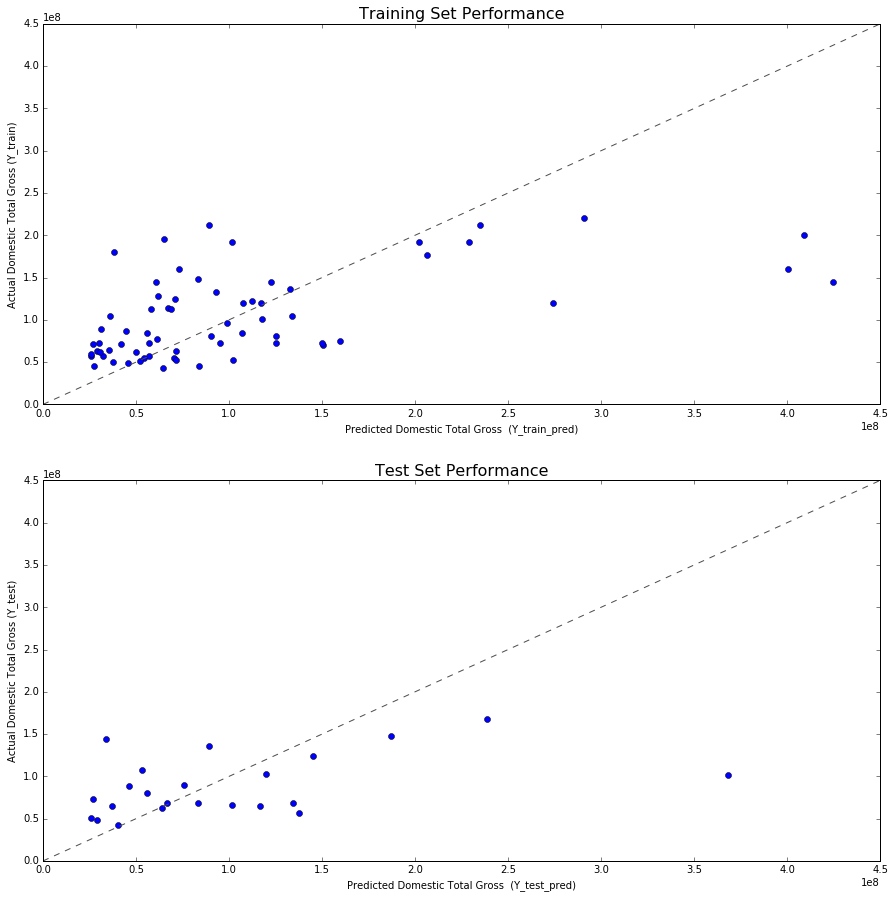

In [325]:
fig, (ax1, ax2) = plt.subplots(2, sharey=False, sharex=False, figsize=(15, 15))

ax1.plot(y_train, y_pred_train, 'o')
ax1.set_ylabel('Actual Domestic Total Gross (Y_train)')
ax1.set_xlabel('Predicted Domestic Total Gross  (Y_train_pred)')
ax1.set_xlim(0,450000000)
ax1.set_ylim(0,450000000)
ax1.set_title('Training Set Performance', size=16)

ax2.plot(y_test, y_pred_test, 'o')
ax2.set_ylabel('Actual Domestic Total Gross (Y_test)')
ax2.set_xlabel('Predicted Domestic Total Gross  (Y_test_pred)')
ax2.set_xlim(0,450000000)
ax2.set_ylim(0,450000000)
ax2.set_title('Test Set Performance', size=16)


ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="--", c=".3")
ax2.plot(ax1.get_xlim(), ax1.get_ylim(), ls="--", c=".3")
plt.show()